# Importing Libraries

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy  as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn .tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor

In [270]:
raw_data = pd.read_csv("raw_data.csv")

In [271]:
raw_data.head()

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74


In [272]:
raw_data.describe(include = "all")

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
count,5975.00000,5975,5975,5975,5975.000000,5.975000e+03,5975,5975,5975,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
unique,NaN,1855,31,11,NaN,NaN,4,2,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Mahindra XUV500 W8 2WD,Maruti,Mumbai,NaN,NaN,Diesel,Manual,First,NaN,NaN,NaN,NaN,NaN
freq,NaN,49,1197,784,NaN,NaN,3195,4266,4903,NaN,NaN,NaN,NaN,NaN
mean,3008.80887,NaN,NaN,NaN,2013.386778,5.867431e+04,NaN,NaN,NaN,1621.606695,112.599819,5.278828,18.179408,9.501647
std,1739.30056,NaN,NaN,NaN,3.247238,9.155851e+04,NaN,NaN,NaN,601.036987,53.659495,0.808959,4.521801,11.205736
min,0.00000,NaN,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,624.000000,34.200000,0.000000,0.000000,0.440000
25%,1502.50000,NaN,NaN,NaN,2012.000000,3.390800e+04,NaN,NaN,NaN,1198.000000,74.000000,5.000000,15.200000,3.500000
50%,3010.00000,NaN,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,1493.000000,92.700000,5.000000,18.160000,5.650000
75%,4514.50000,NaN,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,1984.000000,138.100000,5.000000,21.100000,9.950000


In [273]:
raw_data

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,6014,Maruti Swift VDI,Maruti,Delhi,2014,27365,Diesel,Manual,First,1248,74.00,5,28.40,4.75
5971,6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,1120,71.00,5,24.40,4.00
5972,6016,Mahindra Xylo D4 BSIV,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,2498,112.00,8,14.00,2.90
5973,6017,Maruti Wagon R VXI,Maruti,Kolkata,2013,46000,Petrol,Manual,First,998,67.10,5,18.90,2.65


## Preprocessing and Determining the variables of interest

In [274]:
raw_data = raw_data.drop(['Unnamed: 0','Name'],axis=1)

In [275]:
raw_data

,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,1968,140.80,5,15.20,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti,Delhi,2014,27365,Diesel,Manual,First,1248,74.00,5,28.40,4.75
5971,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,1120,71.00,5,24.40,4.00
5972,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,2498,112.00,8,14.00,2.90
5973,Maruti,Kolkata,2013,46000,Petrol,Manual,First,998,67.10,5,18.90,2.65


In [276]:
raw_data['Manufacturer'].value_counts()

Maruti          1197
Hyundai         1100
Honda            601
Toyota           409
MercedesBenz     318
Volkswagen       315
Ford             298
Mahindra         271
BMW              262
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              57
Jaguar            40
Mitsubishi        27
Mini              26
Fiat              25
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Force              3
ISUZU              2
Smart              1
Ambassador         1
Isuzu              1
Bentley            1
Lamborghini        1
Name: Manufacturer, dtype: int64

### Removing Manufacturers which have less than 10 cars

In [277]:
counts = raw_data.Manufacturer.value_counts()

raw_data = raw_data[raw_data.Manufacturer.isin(counts[counts > 3].index)]

In [278]:
raw_data['Manufacturer'].value_counts()

Maruti          1197
Hyundai         1100
Honda            601
Toyota           409
MercedesBenz     318
Volkswagen       315
Ford             298
Mahindra         271
BMW              262
Audi             236
Tata             186
Skoda            173
Renault          145
Chevrolet        121
Nissan            91
Land              57
Jaguar            40
Mitsubishi        27
Mini              26
Fiat              25
Volvo             21
Porsche           18
Jeep              15
Datsun            13
Name: Manufacturer, dtype: int64

### Dealing with missing values


In [279]:
raw_data.isnull().sum()

Manufacturer         0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine CC            0
Power                0
Seats                0
Mileage Km/L         0
Price                0
dtype: int64

## Working on Numeric Columns

C:\Users\PRAKHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


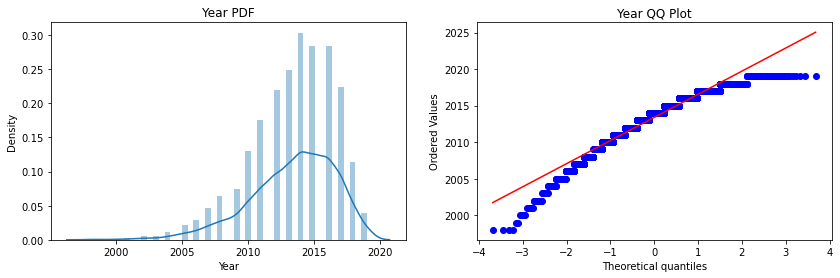

In [280]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Year'])
plt.title('Year PDF')
plt.subplot(122)
stats.probplot(raw_data['Year'], dist="norm", plot=plt)
plt.title('Year QQ Plot')
plt.show()

C:\Users\PRAKHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


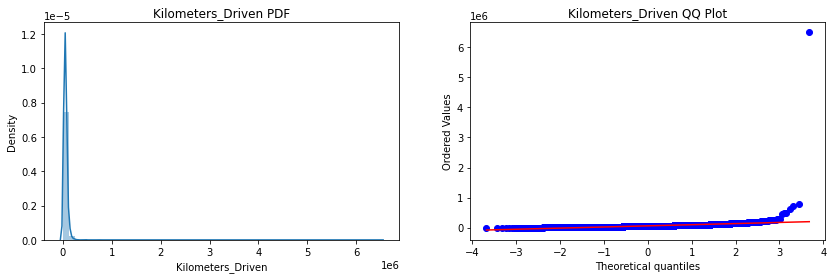

In [281]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Kilometers_Driven'])
plt.title('Kilometers_Driven PDF')
plt.subplot(122)
stats.probplot(raw_data['Kilometers_Driven'], dist="norm", plot=plt)
plt.title('Kilometers_Driven QQ Plot')
plt.show()

C:\Users\PRAKHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


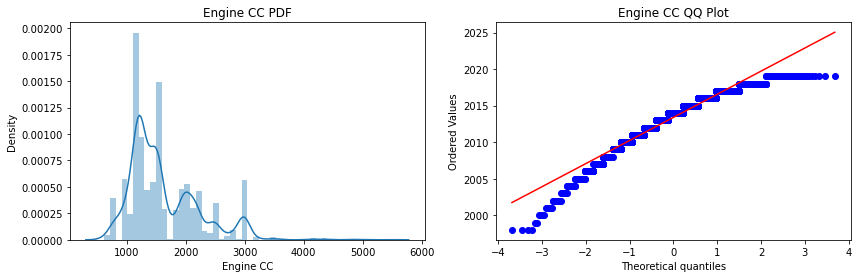

In [282]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Engine CC'])
plt.title('Engine CC PDF')
plt.subplot(122)
stats.probplot(raw_data['Year'], dist="norm", plot=plt)
plt.title('Engine CC QQ Plot')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x27f5072ad00>,
 'caps': [<matplotlib.lines.Line2D at 0x27f507392e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27f5072ab50>],
 'medians': [<matplotlib.lines.Line2D at 0x27f50739880>],
 'fliers': [<matplotlib.lines.Line2D at 0x27f50739b50>],
 'means': []}

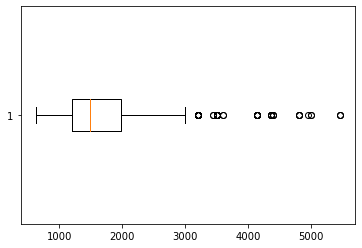

In [283]:
plt.boxplot(raw_data['Engine CC'],vert =0)

C:\Users\PRAKHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


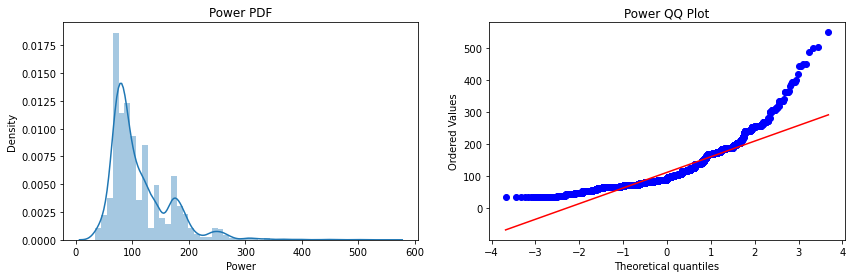

In [284]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Power'])
plt.title('Power PDF')
plt.subplot(122)
stats.probplot(raw_data['Power'], dist="norm", plot=plt)
plt.title('Power QQ Plot')
plt.show()

C:\Users\PRAKHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


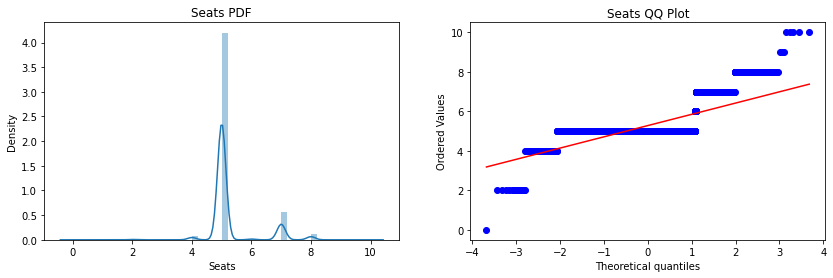

In [285]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Seats'])
plt.title('Seats PDF')
plt.subplot(122)
stats.probplot(raw_data['Seats'], dist="norm", plot=plt)
plt.title('Seats QQ Plot')
plt.show()

C:\Users\PRAKHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


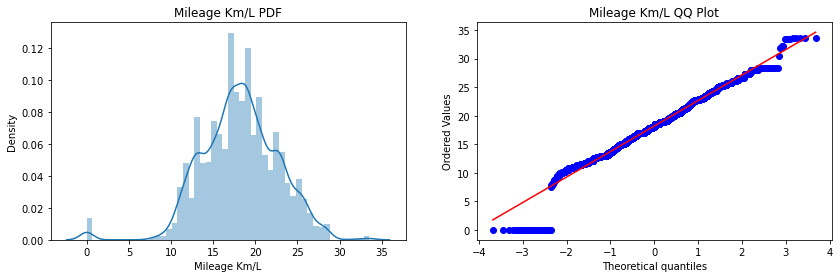

In [286]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(raw_data['Mileage Km/L'])
plt.title('Mileage Km/L PDF')
plt.subplot(122)
stats.probplot(raw_data['Mileage Km/L'], dist="norm", plot=plt)
plt.title('Mileage Km/L QQ Plot')
plt.show()

Text(0.5, 1.0, 'Price and Mileage Km/L')

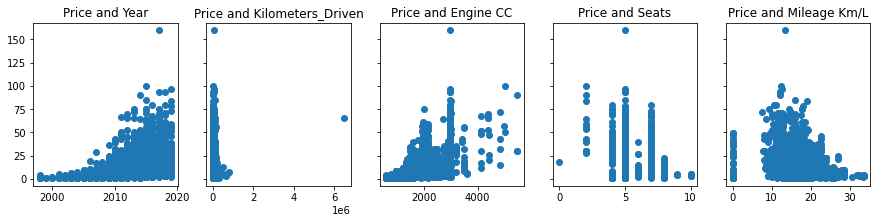

In [287]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(raw_data['Year'],raw_data['Price'])
ax1.set_title('Price and Year')
ax2.scatter(raw_data['Kilometers_Driven'],raw_data['Price'])
ax2.set_title('Price and Kilometers_Driven')
ax3.scatter(raw_data['Engine CC'],raw_data['Price'])
ax3.set_title('Price and Engine CC')
ax4.scatter(raw_data['Seats'],raw_data['Price'])
ax4.set_title('Price and Seats')
ax5.scatter(raw_data['Mileage Km/L'],raw_data['Price'])
ax5.set_title('Price and Mileage Km/L')

In [288]:
log_price = np.log(raw_data['Price'])

# Then we add it to our data frame
raw_data['log_price'] = log_price

C:\Users\PRAKHAR\AppData\Local\Temp\ipykernel_2952\1383285758.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['log_price'] = log_price


Text(0.5, 1.0, 'Price and Mileage Km/L')

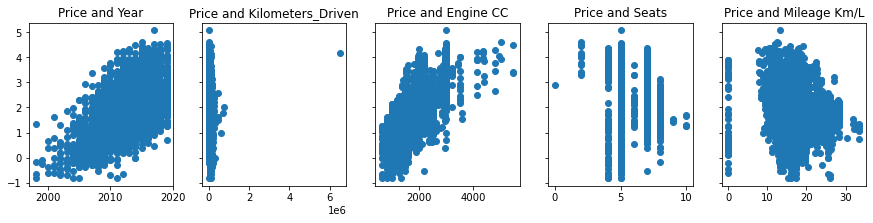

In [289]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(raw_data['Year'],raw_data['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(raw_data['Kilometers_Driven'],raw_data['log_price'])
ax2.set_title('Price and Kilometers_Driven')
ax3.scatter(raw_data['Engine CC'],raw_data['log_price'])
ax3.set_title('Price and Engine CC')
ax4.scatter(raw_data['Seats'],raw_data['log_price'])
ax4.set_title('Price and Seats')
ax5.scatter(raw_data['Mileage Km/L'],raw_data['log_price'])
ax5.set_title('Price and Mileage Km/L')

## Multicolinearity

In [290]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [291]:
variables = raw_data[['Mileage Km/L','Year','Engine CC','Kilometers_Driven','Seats']]

In [292]:
vif = pd.DataFrame()

In [293]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [294]:
vif["Features"] = variables.columns

In [295]:
vif

,VIF,Features
0,27.477438,Mileage Km/L
1,104.419314,Year
2,14.277432,Engine CC
3,1.426367,Kilometers_Driven
4,53.130509,Seats


In [296]:
raw_data = raw_data.drop(['log_price'],axis=1)

## Since not following Assumptions of Linear Rigression, We cannot apply it

## Checking for Outliers

In [297]:
#Since most of the numerical columns are skewed therefore using IQR method

Q1 = raw_data.quantile(0.25)
Q3 = raw_data.quantile(0.75)
IQR = Q3 - Q1
((raw_data < (Q1 - 1.5 * IQR)) | (raw_data > (Q3 + 1.5 * IQR))).sum()

C:\Users\PRAKHAR\AppData\Local\Temp\ipykernel_2952\923624275.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((raw_data < (Q1 - 1.5 * IQR)) | (raw_data > (Q3 + 1.5 * IQR))).sum()


Engine CC             59
Fuel_Type              0
Kilometers_Driven    201
Location               0
Manufacturer           0
Mileage Km/L          69
Owner_Type             0
Power                236
Price                713
Seats                956
Transmission           0
Year                 129
dtype: int64

### Since Engine CC , Kilometers_Driven,Mileage Km/L,Year is less than 250 which is less than 0.05% .
### Therefore Trimming it

In [298]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [299]:
clean_data = raw_data.copy()
columns  = ['Kilometers_Driven','Power']
for column in columns:
    clean_data = remove_outlier(clean_data,column)

In [300]:
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1
((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()

C:\Users\PRAKHAR\AppData\Local\Temp\ipykernel_2952\2591590570.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()


Engine CC             18
Fuel_Type              0
Kilometers_Driven     36
Location               0
Manufacturer           0
Mileage Km/L          61
Owner_Type             0
Power                 49
Price                636
Seats                772
Transmission           0
Year                 113
dtype: int64

### Capping Seats Column

In [301]:
upper_limit =  clean_data['Seats'].quantile(0.75)
lower_limit = clean_data['Seats'].quantile(0.25)
#new_df_cap = df.copy()
clean_data['Seats'] = np.where(
    clean_data['Seats'] > upper_limit,
    upper_limit,
    np.where(
        clean_data['Seats'] < lower_limit,
        lower_limit,
        clean_data['Seats']
    )
)

In [302]:
Q1 = clean_data.quantile(0.25)
Q3 = clean_data.quantile(0.75)
IQR = Q3 - Q1
((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()

C:\Users\PRAKHAR\AppData\Local\Temp\ipykernel_2952\2591590570.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((clean_data < (Q1 - 1.5 * IQR)) | (clean_data > (Q3 + 1.5 * IQR))).sum()


Engine CC             18
Fuel_Type              0
Kilometers_Driven     36
Location               0
Manufacturer           0
Mileage Km/L          61
Owner_Type             0
Power                 49
Price                636
Seats                  0
Transmission           0
Year                 113
dtype: int64

### Segregating Dependent and Independent Features

## Splitting data into train and test split

In [303]:
x=clean_data.drop(['Price'],axis=1)
y=clean_data.Price

In [304]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
xd = pd.get_dummies(x, drop_first=True)

In [305]:
xd

,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Manufacturer_BMW,Manufacturer_Chevrolet,Manufacturer_Datsun,Manufacturer_Fiat,...,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth,Owner_Type_Second,Owner_Type_Third
0,2010,72000,998,58.16,5.0,26.60,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2015,41000,1582,126.20,5.0,19.67,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
2,2011,46000,1199,88.70,5.0,18.20,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,1248,88.76,5.0,20.77,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,2013,40670,1968,140.80,5.0,15.20,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,2014,27365,1248,74.00,5.0,28.40,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5971,2015,100000,1120,71.00,5.0,24.40,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
5972,2012,55000,2498,112.00,5.0,14.00,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
5973,2013,46000,998,67.10,5.0,18.90,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0


In [306]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(xd)

StandardScaler()

In [307]:
inputs_scaled = scaler.transform(xd)

In [308]:
inputs_scaled.shape

(5531, 46)

## Train Test Split

In [309]:
x_train,x_test,y_train,y_test = train_test_split(xd,y,test_size=0.2,random_state=42)

## Decision Tree

In [310]:
reg_tree = DecisionTreeRegressor(max_depth = 5, min_samples_leaf =250)
reg_tree.fit(x_train ,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=250)

In [311]:
y_predict_train = reg_tree.predict(x_train)
y_predict_train

array([ 3.65129032,  7.88018587,  3.27905039, ..., 14.46682482,
        6.12831874,  3.27905039])

## Accuracy Parameters

In [312]:
#MAE
np.mean(np.abs(y_train - y_predict_train))

2.440910463132536

In [313]:
#MSE
np.mean((y_train - y_predict_train)**2)

18.411988339366683

In [314]:
# RMSE
np.sqrt(np.mean((y_train - y_predict_train)**2))

4.290919288377105

In [315]:
#MAPE
np.mean(np.abs(y_train - y_predict_train)/y_train)*100

33.891960250030124

### Hyperparameter tuning of Decision Tree

In [316]:
params = {
'max_depth': [1,2,3,4,5,6,7,8,9,10,11,None],
'min_samples_leaf' : [250,400,None]}

In [317]:
grid = GridSearchCV( DecisionTreeRegressor(), params, cv=2, n_jobs=-1)
grid.fit(x_train, y_train)

C:\Users\PRAKHAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PRAKHAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PRAKHAR\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1342, in fit
    super().fit(
  File "C:\Users\PRAKHAR\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 255, in fit
    check_scalar(
  File "C:\Users\PRAKHAR\anaconda3\lib\site-packages\sklearn\utils\validatio

GridSearchCV(cv=2, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, None],
                         'min_samples_leaf': [250, 400, None]})

In [318]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 250}

## Final Fit

In [319]:
y_predict_test = reg_tree.predict(x_test)
y_predict_test

array([14.46682482, 14.46682482,  9.88638889, ...,  4.9066092 ,
       28.06695312,  6.12831874])

## Accuracy Parameters after final test

In [320]:
#MAE
np.mean(np.abs(y_test - y_predict_test))

2.25553454127744

In [321]:
#MSE
np.mean((y_test - y_predict_test)**2)

16.063965548071288

In [322]:
# RMSE
np.sqrt(np.mean((y_test - y_predict_test)**2))

4.007987718053947

In [323]:
#MAPE
np.mean(np.abs(y_test - y_predict_test)/y_test)*100

31.642354113808928

## KNN Model

In [366]:
from sklearn.neighbors import KNeighborsRegressor
#Create kNN (k Nearest Neighbor) regressor, with k value of 5
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [367]:
y_pred = knn.predict(x_train)

## Model Perfromance Checks

In [368]:
# MAE
np.mean(np.abs(y_train - y_pred))

2.8410642706449694

In [342]:
# MSE
np.mean((y_train - y_pred)**2)

22.12742986676198

In [343]:
# RMSE
np.sqrt(np.mean((y_train - y_pred)**2))

4.703980215388026

In [344]:
# MAPE
np.mean(np.abs(y_train-y_pred)/y_train)*100

46.022563623905704

### Hyperparameter Tuning

In [345]:
params = {
'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11]}

In [346]:
grid = GridSearchCV( KNeighborsRegressor(), params, cv=2, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [347]:
grid.best_score_

0.4888836501649091

In [348]:
grid.best_params_

{'n_neighbors': 6}

## Final Fit KNN

In [349]:
y_pred = knn.predict(x_test)

## Model Perfromance Checks

In [350]:
# MAE
np.mean(np.abs(y_test - y_pred))

3.2710117434507664

In [351]:
# MSE
np.mean((y_test - y_pred)**2)

29.642512139917702

In [352]:
# RMSE
np.sqrt(np.mean((y_test - y_pred)**2))

5.444493745052675

In [353]:
# MAPE
np.mean(np.abs(y_test -y_pred)/y_test)*100

54.42326141765268

## Tried to predict used car price through linear regression, K-NN and Decision tree

--  For the linear regression model assumption has not been satisfied so we can not apply this.

--  Then fitted k-nn and decision tree out of this decision tree performed well as rmse of decison tree is less than knn.